In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
cp "/content/gdrive/My Drive/ml_aag/dataset.zip" "dataset.zip"

In [ ]:
from zipfile import ZipFile
file_name = "dataset.zip"

with ZipFile(file_name, 'r') as zip:
    print('Extracting all the files now...')
    zip.extractall()
    print('Done!')

Extracting all the files now...
Done!


In [ ]:
!rm 'dataset.zip'
!mkdir 'dataset'
!mkdir 'dataset/train'
!mkdir 'dataset/test'
!mkdir 'dataset/val'
!mkdir 'dataset/train/Normal'
!mkdir 'dataset/train/Pnemonia'
!mkdir 'dataset/val/Normal'
!mkdir 'dataset/val/Pnemonia'
!mkdir 'ensemble_model'

In [ ]:
import pandas as pd
import os
from shutil import copy

In [ ]:
print("Summary of Dataset :- ")
summary = pd.read_csv('Chest_xray_Corona_dataset_Summary.csv')
summary

Summary of Dataset :- 


,Unnamed: 0,Label,Label_1_Virus_category,Label_2_Virus_category,Image_Count
0,0,Normal,NaN,NaN,1576
1,1,Pnemonia,Stress-Smoking,ARDS,2
2,2,Pnemonia,Virus,NaN,1493
3,3,Pnemonia,Virus,COVID-19,58
4,4,Pnemonia,Virus,SARS,4
5,5,Pnemonia,bacteria,NaN,2772
6,6,Pnemonia,bacteria,Streptococcus,5


In [ ]:
labels_file = pd.read_csv('Chest_xray_Corona_Metadata.csv')
labels_file = labels_file.sample(frac=1)
labels_file.head(5)

,Unnamed: 0,X_ray_image_name,Label,Dataset_type,Label_2_Virus_category,Label_1_Virus_category
5703,5726,person101_bacteria_486.jpeg,Pnemonia,TEST,NaN,bacteria
1519,1519,person1085_bacteria_3025.jpeg,Pnemonia,TRAIN,NaN,bacteria
145,145,IM-0371-0001.jpeg,Normal,TRAIN,NaN,NaN
92,92,IM-0265-0001.jpeg,Normal,TRAIN,NaN,NaN
1179,1179,NORMAL2-IM-1219-0001.jpeg,Normal,TRAIN,NaN,NaN


In [ ]:
labels_file['Dataset_type'].value_counts()

TRAIN    5286
TEST      624
Name: Dataset_type, dtype: int64

In [ ]:
print("Seperating Dataset with help of metadata")
count = 0
for i in range(len(labels_file)):
  label = labels_file.iloc[i]
  file_name = label.loc['X_ray_image_name']
  type_data = label.loc['Dataset_type']
  if type_data == 'TRAIN' and count < 4286:
    img_path = os.path.join('Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/train',file_name)
    dest = ""
    if label.loc['Label'] == 'Normal':
      dest = 'dataset/train/Normal'
    else:
      dest = 'dataset/train/Pnemonia'
    copy(img_path,os.path.join(dest,file_name))
    count = count + 1
  elif type_data == 'TRAIN':
    img_path = os.path.join('Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/train',file_name)
    dest = ""
    if label.loc['Label'] == 'Normal':
      dest = 'dataset/val/Normal'
    else:
      dest = 'dataset/val/Pnemonia'
    copy(img_path,os.path.join(dest,file_name))
    count = count + 1
  else:
    img_path = os.path.join('Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/test',file_name)
    dest = "dataset/test"
    copy(img_path,os.path.join(dest,file_name))
print("Done")

Seperating Dataset with help of metadata
Done


In [ ]:
!rm -r 'Coronahack-Chest-XRay-Dataset'
!rm 'Chest_xray_Corona_Metadata.csv'
!rm 'Chest_xray_Corona_dataset_Summary.csv'

In [ ]:
train_data = len(os.listdir("dataset/train/Normal"))+len(os.listdir("dataset/train/Pnemonia"))
val_data = len(os.listdir("dataset/val/Normal"))+len(os.listdir("dataset/val/Pnemonia"))
test_data = len(os.listdir("dataset/test"))
print("Number of sample in train data :- ",train_data)
print("Number of sample in val data :- ",val_data)
print("Number of sample in test data :- ",test_data)

Number of sample in train data :-  4286
Number of sample in val data :-  1000
Number of sample in test data :-  624


In [ ]:
print("Train -> Normal :- ",len(os.listdir("dataset/train/Normal")))
print("Test -> Pnemonia :- ",len(os.listdir("dataset/train/Pnemonia")))

Train -> Normal :-  1094
Test -> Pnemonia :-  3192


In [ ]:
from keras.applications import MobileNet,VGG19,InceptionV3,ResNet152V2,InceptionResNetV2,Xception,DenseNet201
from keras.models import Sequential,Model
from keras.layers import Dense,Dropout,Activation,Flatten,GlobalMaxPooling2D,Conv2D,MaxPooling2D,ZeroPadding2D,AvgPool2D,Input,Lambda,Concatenate,LeakyReLU
from keras.layers.normalization import BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint,EarlyStopping,ReduceLROnPlateau
from matplotlib import pyplot as plt
import numpy as np
import cv2
from matplotlib import image
from keras import applications
from keras.utils.vis_utils import plot_model

Normal :- 


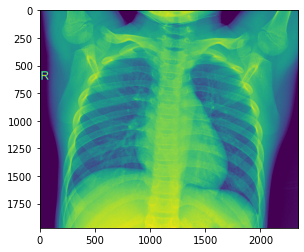

Pnemonia :- 


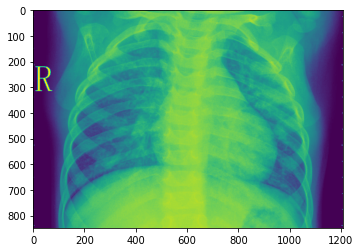

In [ ]:
img = image.imread(os.path.join("dataset/train/Normal",os.listdir('dataset/train/Normal')[0]))
img2 = image.imread(os.path.join("dataset/train/Pnemonia",os.listdir('dataset/train/Pnemonia')[0]))
print('Normal :- ')
plt.imshow(img)
plt.show()
print('Pnemonia :- ')
plt.imshow(img2)
plt.show()

In [ ]:
train_datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.3,
    channel_shift_range=0.3,
    fill_mode="nearest",
    horizontal_flip=True,
    rescale=1. / 255,
)

val_datagen =  ImageDataGenerator(
    rescale=1. / 255,
)

In [ ]:
train = train_datagen.flow_from_directory(
    directory = train_dir,
    target_size = shape,
    class_mode='binary',
    shuffle = True,
    batch_size = batch_size
)

validation = train_datagen.flow_from_directory(
    directory = val_dir,
    target_size = shape,
    class_mode = 'binary',
    shuffle = True,
    batch_size = batch_size
)

Found 4286 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
def load_models(SHAPE):
  vgg19 = VGG19(weights = 'imagenet', include_top = False, input_shape = SHAPE)
  resnet = ResNet152V2(weights = 'imagenet', include_top = False, input_shape = SHAPE)
  mobilenet = MobileNet(weights = 'imagenet', include_top = False, input_shape = SHAPE)
  inception = InceptionV3(weights = 'imagenet', include_top = False, input_shape = SHAPE)
  inception_resnet = InceptionResNetV2(weights = 'imagenet', include_top = False, input_shape = SHAPE)
  xception = Xception(weights = 'imagenet', include_top = False, input_shape = SHAPE)
  densenet = DenseNet201(weights = 'imagenet', include_top = False, input_shape = SHAPE)

  for layer in vgg19.layers:
    layer.trainable = False

  for layer in resnet.layers:
    layer.trainable = False

  for layer in mobilenet.layers:
    layer.trainable = False

  for layer in inception.layers:
    layer.trainable = False

  for layer in inception_resnet.layers:
    layer.trainable = False

  for layer in xception.layers:
    layer.trainable = False

  for layer in densenet.layers:
    layer.trainable = False

  return vgg19,resnet,mobilenet,inception,inception_resnet,xception,densenet



In [ ]:
vgg19,resnet,mobilenet,inception,inception_resent,xception,densenet = load_models(INPUT_SHAPE)

74842112/74836368 [==============================] - 0s 0us/step


In [ ]:
inp = Input(INPUT_SHAPE)

In [ ]:
#all major pretrained models
vgg_19 = vgg19(inp)
x_vgg_19 = GlobalMaxPooling2D()(vgg_19)
x_vgg_19 = Flatten()(x_vgg_19)
x_vgg_19 = Dense(16,activation='relu')(x_vgg_19)
x_vgg_19 = Dense(8, activation='relu')(x_vgg_19)

resnet = resnet(inp)
x_resnet = GlobalMaxPooling2D()(resnet)
x_resnet = Flatten()(x_resnet)
x_resnet = Dense(16,activation='relu')(x_resnet)
x_resnet = Dense(8, activation='relu')(x_resnet)


mobilenet = mobilenet(inp)
x_mobilenet = GlobalMaxPooling2D()(mobilenet)
x_mobilenet = Dropout(0.2)(x_mobilenet)
x_mobilenet = Flatten()(x_mobilenet)
x_mobilenet = Dense(16,activation='relu')(x_mobilenet)
x_mobilenet = Dense(8, activation='relu')(x_mobilenet)

inception = inception(inp)
x_inception = GlobalMaxPooling2D()(inception)
x_inception = Flatten()(x_inception)
x_inception = Dropout(0.2)(x_inception)
x_inception = Dense(16,activation='relu')(x_inception)
x_inception = Dense(8, activation='relu')(x_inception)

inception_resent = inception_resent(inp)
x_inception_resent = GlobalMaxPooling2D()(inception_resent)
x_inception_resent = Dropout(0.2)(x_inception_resent)
x_inception_resent = Flatten()(x_inception_resent)
x_inception_resent = Dense(16,activation='relu')(x_inception_resent)
x_inception_resent = Dense(8, activation='relu')(x_inception_resent)

xception = xception(inp)
x_xception = GlobalMaxPooling2D()(xception)
x_xception = Flatten()(x_xception)
x_xception = Dropout(0.2)(x_xception)
x_xception = Dense(16,activation='relu')(x_xception)
x_xception = Dense(8, activation='relu')(x_xception)

densenet = densenet(inp)
x_densenet = GlobalMaxPooling2D()(densenet)
x_densenet = Dropout(0.2)(x_densenet)
x_densenet = Flatten()(x_densenet)
x_densenet = Dense(16,activation='relu')(x_densenet)
x_densenet = Dense(8, activation='relu')(x_densenet)

In [ ]:
#intuitive cnn model
intuititive = inp
intuititive = Conv2D(32, (3, 3))(intuititive)
intuititive = Activation('relu')(intuititive)
intuititive = MaxPooling2D(pool_size=(2, 2))(intuititive)

intuititive = Conv2D(32, (3, 3))(intuititive)
intuititive = Activation('relu')(intuititive)
intuititive = MaxPooling2D(pool_size=(2, 2))(intuititive)


intuititive = Conv2D(64,(3,3))(intuititive)
intuititive = Activation("relu")(intuititive)
intuititive = Conv2D(250,(3,3))(intuititive)
intuititive = Activation("relu")(intuititive)

intuititive = Conv2D(128,(3,3))(intuititive)
intuititive = Activation("relu")(intuititive)
intuititive = AvgPool2D(2,2)(intuititive)
intuititive = Conv2D(64,(3,3))(intuititive)
intuititive = Activation("relu")(intuititive)
intuititive = AvgPool2D(2,2)(intuititive)

intuititive = Conv2D(256,(2,2))(intuititive)
intuititive = Activation("relu")(intuititive)
intuititive = MaxPooling2D(2,2)(intuititive)

intuititive = Flatten()(intuititive)
intuititive = Dropout(0.25)(intuititive)
intuititive = Dense(8)(intuititive)


In [ ]:
#dark covid net model from research paper

#helper function
def conv_block(filters,inp_layer,size=3,strides=1):
  for_pad = lambda s: s if s > 2 else 3
  darknet = ZeroPadding2D(padding=(for_pad(size) - 1)//2)(inp_layer)
  darknet = Conv2D(filters=filters,kernel_size=(size,size),strides=strides,use_bias=False)(darknet)
  darknet = BatchNormalization()(darknet)
  darknet = LeakyReLU()(darknet)
  return darknet

def three_x_conv_block(ni,nf,inp_layer):
  darknet = conv_block(filters=nf,inp_layer=inp_layer)
  darknet = conv_block(filters=ni,inp_layer=darknet,size=1)
  darknet = conv_block(filters=nf,inp_layer=darknet)
  return darknet

In [ ]:
#1st DN
darknet = conv_block(filters=8,inp_layer=inp)
darknet = MaxPooling2D(pool_size=(2,2),strides=2)(darknet)

#2nd block
darknet = conv_block(filters=16,inp_layer=darknet)
darknet = MaxPooling2D(pool_size=(2,2),strides=2)(darknet)

#3rd block
darknet = three_x_conv_block(ni=16,nf=32,inp_layer=darknet)
darknet = MaxPooling2D(pool_size=(2,2),strides=2)(darknet)

#4th block
darknet = three_x_conv_block(ni=32,nf=64,inp_layer=darknet)
darknet = MaxPooling2D(pool_size=(2,2),strides=2)(darknet)

#5th block
darknet = three_x_conv_block(ni=64,nf=128,inp_layer=darknet)
darknet = MaxPooling2D(pool_size=(2,2),strides=2)(darknet)

#6th block
darknet = three_x_conv_block(ni=128,nf=256,inp_layer=darknet)

#7th block
darknet = conv_block(filters=128,inp_layer=darknet,size=1)

#8th block
darknet = conv_block(filters=256,inp_layer=darknet)

#9th block
darknet = conv_block(filters=2,inp_layer=darknet)

#ann
darknet = Flatten()(darknet)
darknet = Dense(10,activation='relu')(darknet)
darknet = Dense(8,activation='relu')(darknet)

In [ ]:
x = Concatenate()([x_resnet, x_vgg_19,x_inception_resent,x_inception,x_mobilenet,x_xception,x_densenet,intuititive,darknet])
out = Dense(1, activation='sigmoid')(x)
model = Model(inp, out)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics='accuracy')

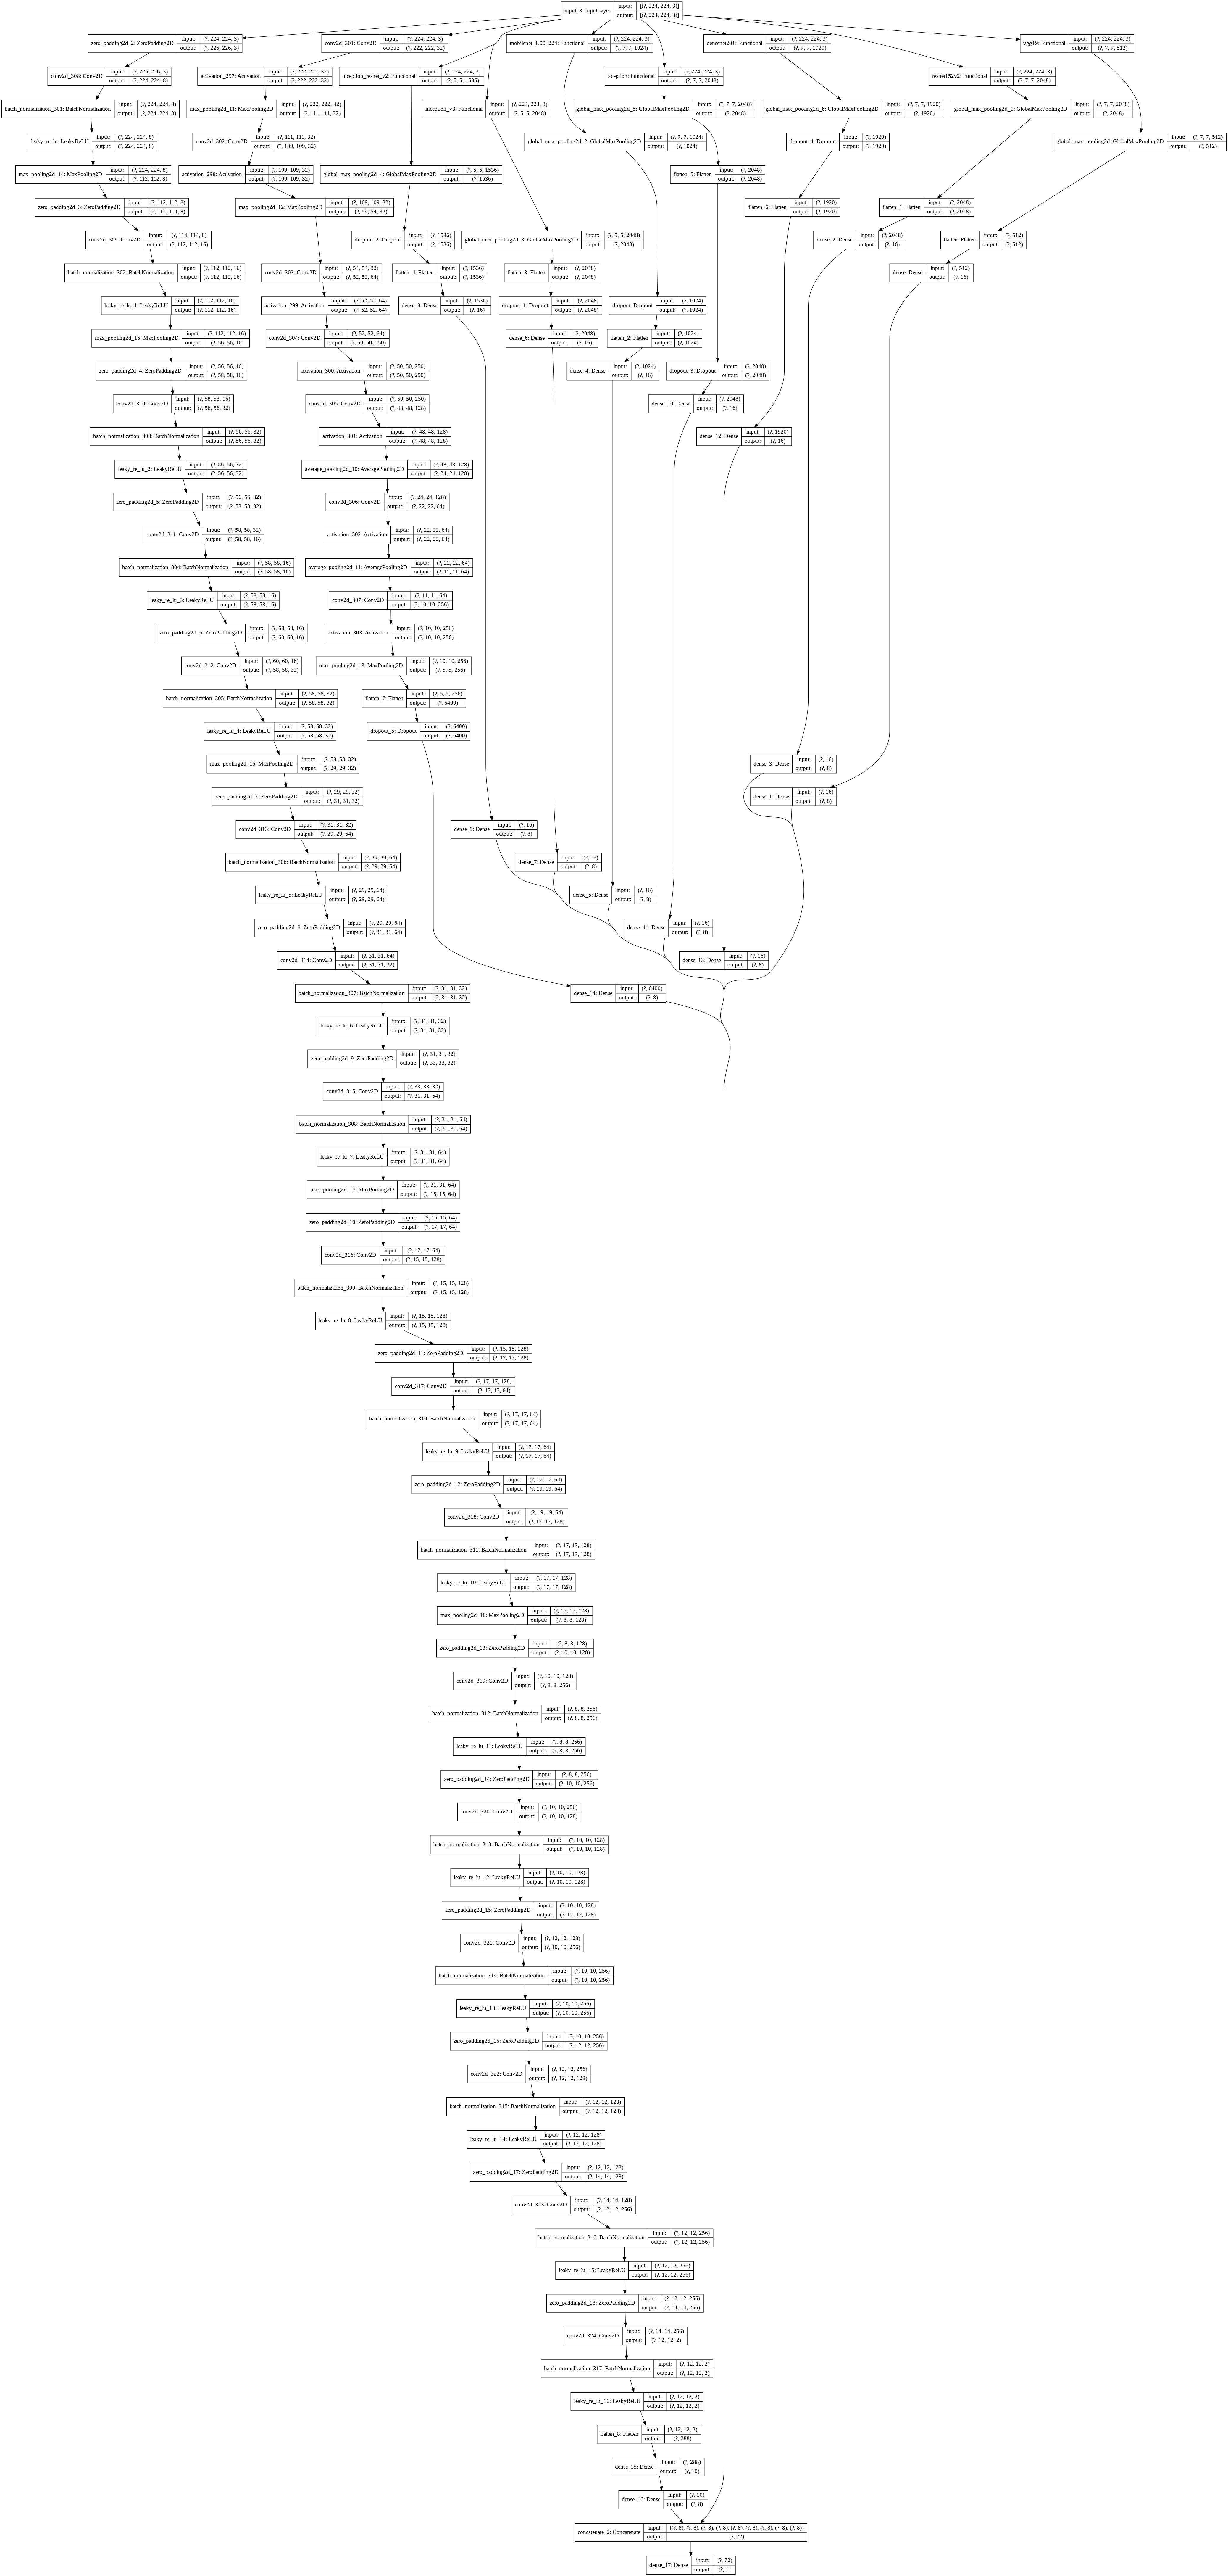

In [ ]:
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
print(model.summary())

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_8 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
zero_padding2d_2 (ZeroPadding2D (None, 226, 226, 3)  0           input_8[0][0]                    
__________________________________________________________________________________________________
conv2d_308 (Conv2D)             (None, 224, 224, 8)  216         zero_padding2d_2[0][0]           
__________________________________________________________________________________________________
batch_normalization_301 (BatchN (None, 224, 224, 8)  32          conv2d_308[0][0]                 
_______________________________________________________________________________________

In [ ]:
from keras.callbacks import ModelCheckpoint
filepath = "ensemble_model/saved-model-{epoch:02d}-{val_accuracy:.2f}.hdf5"
checkpoint = ModelCheckpoint(filepath,
                             monitor='val_accuracy',
                             save_best_only=True,
                             mode='max')

earlystop = EarlyStopping(
                          monitor='val_loss',
                          min_delta=0,
                          patience=10,
                          restore_best_weights=True)

learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy',
                                            patience=5,
                                            verbose=1,
                                            factor=0.2,
                                            min_lr=0.00001)

callbacks = [checkpoint,earlystop,learning_rate_reduction]

In [ ]:
history = model.fit(
    train,
    epochs = epochs,
    validation_data = validation,
    callbacks = callbacks
)

Epoch 1/100
268/268 [==============================] - 210s 784ms/step - loss: 0.2594 - accuracy: 0.8966 - val_loss: 0.4924 - val_accuracy: 0.8890
Epoch 2/100
268/268 [==============================] - 193s 719ms/step - loss: 0.1608 - accuracy: 0.9342 - val_loss: 0.3124 - val_accuracy: 0.9000
Epoch 3/100
268/268 [==============================] - 188s 702ms/step - loss: 0.1292 - accuracy: 0.9512 - val_loss: 0.5700 - val_accuracy: 0.8200
Epoch 4/100
268/268 [==============================] - 189s 704ms/step - loss: 0.1248 - accuracy: 0.9564 - val_loss: 0.1073 - val_accuracy: 0.9610
Epoch 5/100
268/268 [==============================] - 186s 694ms/step - loss: 0.1134 - accuracy: 0.9580 - val_loss: 0.2005 - val_accuracy: 0.9230
Epoch 6/100
268/268 [==============================] - 186s 693ms/step - loss: 0.1126 - accuracy: 0.9543 - val_loss: 0.1645 - val_accuracy: 0.9380
Epoch 7/100
268/268 [==============================] - 187s 698ms/step - loss: 0.1082 - accuracy: 0.9552 - val_loss: 1

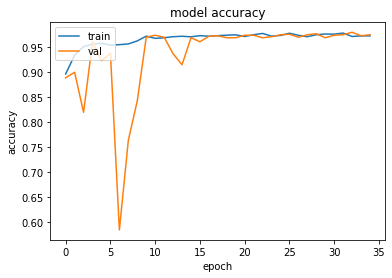

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

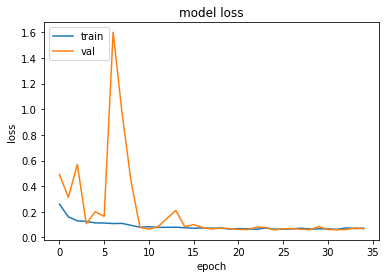

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
model.save('final_model.h5')

In [ ]:
!zip -r 'model.zip' 'final_model.h5'

  adding: final_model.h5 (deflated 8%)


In [ ]:
!cp 'model.zip' '/content/gdrive/My Drive'

In [ ]:
train.class_indices

{'Normal': 0, 'Pnemonia': 1}

In [ ]:
dict_labels = train.class_indices
inv_map = {v: k for k, v in dict_labels.items()}

In [ ]:
inv_map

{0: 'Normal', 1: 'Pnemonia'}

In [ ]:
true_labels = []
predicted_labels = []
for i in range(len(labels_file)):
  label = labels_file.iloc[i]
  file_name = label.loc['X_ray_image_name']
  type_data = label.loc['Dataset_type']
  class_name = label.loc['Label']
  if type_data == 'TEST':
    img_path = os.path.join('dataset/test',file_name)
    img = cv2.imread(img_path)
    img = cv2.resize(img,(224,224))
    img = np.reshape(img,[1,224,224,3])
    img = img/255.0
    classes = model.predict(img)
    predicted_labels.append(np.round(classes[0][0]))
    true_labels.append(train.class_indices[class_name])

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn import metrics

In [ ]:
accuracy_score(true_labels, predicted_labels)

0.9038461538461539

In [ ]:
print("Report of model is :-\n",metrics.classification_report(true_labels,predicted_labels))

Report of model is :-
               precision    recall  f1-score   support

           0       0.87      0.88      0.87       234
           1       0.93      0.92      0.92       390

    accuracy                           0.90       624
   macro avg       0.90      0.90      0.90       624
weighted avg       0.90      0.90      0.90       624



In [ ]:
print("Confusion matrix is :-\n",metrics.confusion_matrix(true_labels,predicted_labels))

Confusion matrix is :-
 [[206  28]
 [ 32 358]]
